# Статистический анализ данных
# 
Описание проекта
:
Нам предстоит провести исследование о пользователях самокатов go на основании имеющихся у нас данных о пользователях самокатов, их поездках и типов подписок. В ходе исследования нам предстоит проверить несколько гипотез: гипотезу о том, тратят ли больше времени на поездки пользователи с подпиской и принесут ли они больше прибыли бизнесу или нет. Гипотезу о том, превышает ли расстояние одной поездки пользователя с подпиской, расстояние с точки зрения износа самоката (3130м). Гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Также в конце нашего исследования нам предстоит посчитать помесячную выручку, которую принёс каждый пользователь. И ответить на вопрос о том, Какой тест нам понадобится для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после оновления техподдержкой серверов, взаимодествующих с мобильным приложением.# 

Цель проекта: Проанализроватье данныео пользователях самокатов GO и провеитье некоторые гипотезы, которые могут помочь бизнесу выраст..

Пользователи — users_go.csv
user_id	- уникальный идентификатор пользователя
name - имя пользователя
age - возраст
city -	город
subscription_type -	тип подписки (free, ultra)
Поездки — rides_go.csv
user_id - уникальный идентификатор пользователя
distance-расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration-продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date-дата совершения поездки
Подписки — subscriptions_go.csv
subscription_type-тип подписки
minute_price-стоимость одной минуты поездки по данной подписке
start_ride_price-стоимость начала поездки
subscription_fee-стоимость ежемесячного платежа

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats as st
import numpy as np





**у нас три датафрейма, проанализируем каждый по отдельности**

#### Шаг 1. Загрузка данных

In [3]:
print(users.head())


   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra


**с помощью метода info мы видим, что датафрейм имеет 1565 строк и 5 колонок с несколькими типами данных,
посмотрим кадую колонку в отдельности, найдя уникальные значения в каждой колонке. Для этого можно написать функцию со вложенным циклом**

In [4]:
def columns(df):
    for column in df.columns:
        print('уникальные значения в', column)
        print(df[column].unique())
        

In [5]:
columns(users)

уникальные значения в user_id
[   1    2    3 ... 1532 1533 1534]
уникальные значения в name
['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Диана' 'Дарина' 'Данил' 'Артемий' 'Лиана' 'Альберт' 

In [6]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**посмотрим ощую информаццию следующего датафрейма о поездках(rides) с помощью метода info. Таблица состоит из 18068 строк с четрьмя колонками - идентиикатор пользователей(user_id), пройденная дистанция(distance), продолжительноть поездки(duration) и дата поездки(date). Занимаемая память всего 564.8 kb**

***Посмотрим и здесь уникальные значения***

In [8]:
columns(rides)

уникальные значения в user_id
[   1    2    3 ... 1532 1533 1534]
уникальные значения в distance
[4409.9191402  2617.59215346  754.15980696 ... 3826.1855073  2902.30866066
 2371.71119224]
уникальные значения в duration
[25.59976897 15.81687145  6.23211346 ... 18.43505138 16.6743622
 15.89391697]
уникальные значения в date
['2021-01-01' '2021-01-18' '2021-04-20' '2021-08-11' '2021-08-28'
 '2021-10-09' '2021-10-19' '2021-11-06' '2021-11-14' '2021-11-22'
 '2021-12-14' '2021-12-22' '2021-03-15' '2021-03-18' '2021-03-23'
 '2021-04-08' '2021-04-13' '2021-06-20' '2021-07-02' '2021-07-18'
 '2021-08-03' '2021-10-27' '2021-12-18' '2021-01-31' '2021-02-24'
 '2021-02-26' '2021-04-12' '2021-05-07' '2021-05-21' '2021-05-22'
 '2021-07-04' '2021-07-07' '2021-07-14' '2021-09-04' '2021-02-10'
 '2021-02-16' '2021-06-06' '2021-06-27' '2021-07-06' '2021-07-17'
 '2021-08-14' '2021-10-08' '2021-10-24' '2021-10-30' '2021-11-25'
 '2021-03-01' '2021-03-13' '2021-03-25' '2021-04-24' '2021-05-08'
 '2021-05-30' '2

***на первый взгляд в колонках distance и duration нет аномалий и выбросов. убедимся в этом, вызвав метод describe().***

In [9]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [10]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [11]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


***в датафрейме subscriptions всего 2 строки и 4 колонки. Пристствуют разные типы данных.***

In [13]:
columns(subscriptions)

уникальные значения в subscription_type
['free' 'ultra']
уникальные значения в minute_price
[8 6]
уникальные значения в start_ride_price
[50  0]
уникальные значения в subscription_fee
[  0 199]


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Первичный анализ данных выполнен верно. Можем переходить к следующему этапу)
</div>

#### Шаг 2. Предобработка данных

In [14]:
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [15]:
rides['month'] = rides['date'].dt.month

In [16]:
print(rides.head())

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8


#### Шаг 2. Предобработка данных

In [17]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [18]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [19]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**как видим пропущенных значений в датафреймах нет**

In [20]:
users.duplicated().sum()

31

**Мы нашли в датафрейме 31 дубликат, удалим их с помощью метода drop.duplicates()**

In [21]:
users = users.drop_duplicates()

**проверим еще раз на дубликаты**

In [22]:
users.duplicated().sum()

0

In [23]:
rides.duplicated().sum()

0

In [24]:
subscriptions.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

In [25]:
print(users['city'].unique())




['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


*Построим круговую диаграмму распределения по городам*

**Как видно на графике, что чаще всего встречаются три города - Пятигорск, Екатеринбург и Ростов-на дону**

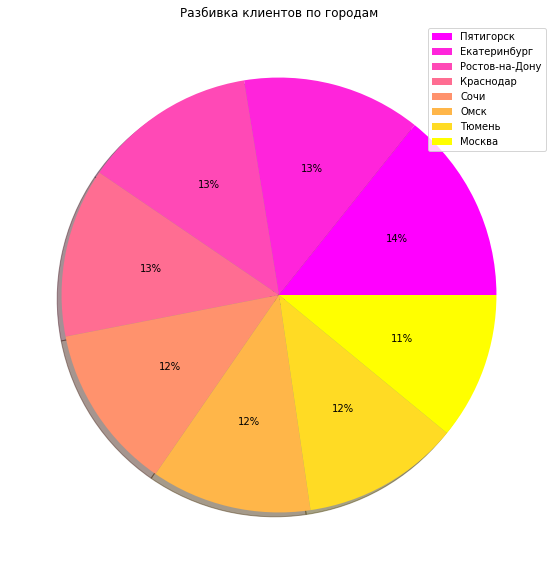

In [26]:
users.groupby('city')['city'].agg('count').sort_values(ascending=False).plot(kind='pie', labels=None, cmap='spring', shadow=True, legend=True, label='', figsize=(10, 10), autopct='%1.0f%%', title='Разбивка клиентов по городам')
plt.show()


**Видно, что по количеству пользователей лидируют Пятигорск, Екатеринбург и Ростов-на-Дону, но в целом распределение по городам равномерное и лидерство трех городов несущественное**

In [27]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [28]:
df_subscriptions = len(users[users['subscription_type'] == 'ultra'])
df_subscriptions_none = len(users[users['subscription_type'] != 'ultra']) 
display(df_subscriptions)
display(df_subscriptions_none)





699

835

In [29]:
print('Доля пользователей с подпиской равна', '{:.2%}'.format(df_subscriptions / users.shape[0]))
print('Доля пользователей без подписки равна', '{:.2%}'.format(df_subscriptions_none / users.shape[0]))

Доля пользователей с подпиской равна 45.57%
Доля пользователей без подписки равна 54.43%


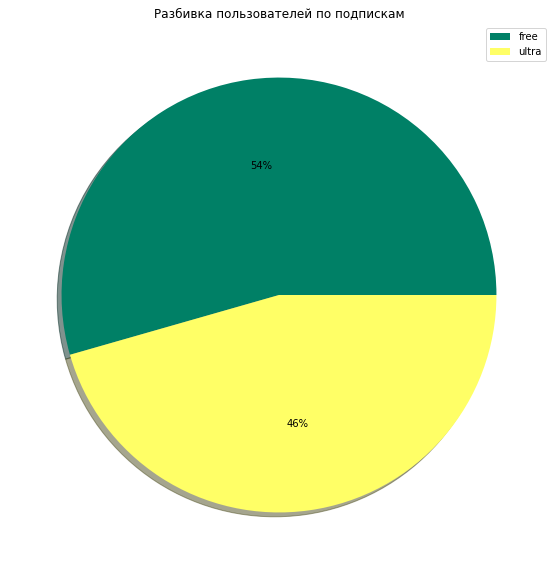

In [30]:
subscriptions_grouped = users.groupby('subscription_type')['subscription_type'].agg('count').plot(kind='pie', figsize=(10, 10), cmap ='summer', legend=True, shadow=True, labels=None, label='', autopct='%1.0f%%', title='Разбивка пользователей по подпискам')
plt.show()

**доля пользователей с подпиской и доля пользователей без подписки примерно равны**

In [31]:
sorted_users_age = users['age'].sort_values(ascending=False)
sorted_users_age.unique()

array([43, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12])

**нашли уникальные значения столбца age**

In [32]:
users['age'].mean().round(0)

25.0

**Средний возраст пользователей 25 лет**

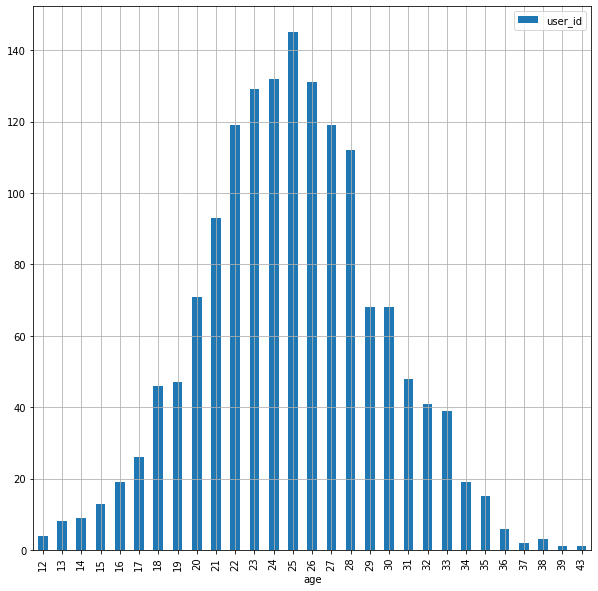

In [33]:
(
    users.pivot_table(index='age', values='user_id', aggfunc=('count'))
    .plot(kind='bar', xlim=(12, 43), grid=True, figsize=(10, 10))
)    
plt.xlabel='age'
plt.ylabel='count'
plt.title='Зависимость количества поездок от возраста'
plt.show()

**Больше всего подписок в возрасте 25 лет, а меньше всего в 43, так как в зрелом возрасте люди предпочитают пользоваться личным авто либо общественным транспортом.**

In [34]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Видино, что выбросов и аномалий нет, средний возаст пользователей 25 лет, минимальный - 12 лет, а максималный 43 года**

In [35]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<AxesSubplot:>

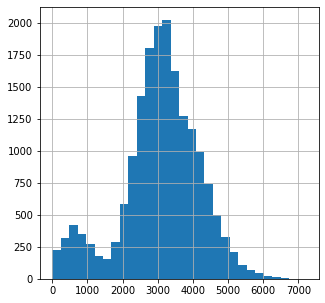

In [36]:
rides['distance'].mean().round(0).astype(int)
rides['distance'].hist(bins=30, figsize=(5, 5))

**Среднее расстояния пользователя за 1 поездку равно 3071 метр**

In [37]:
rides['duration'].describe().round(0).astype(int)

count    18068
mean        18
std          6
min          0
25%         14
50%         18
75%         22
max         41
Name: duration, dtype: int64

**Средняя продолжительность поездки 18 минут**

<AxesSubplot:>

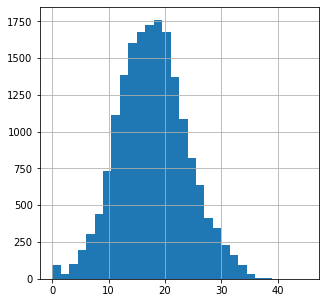

In [38]:
rides['duration'].hist(bins=30, figsize=(5, 5), grid=True, range=(0, 45))

#### Шаг 4. Объединение данных

In [39]:
new_data_merged = users.merge(rides, on='user_id', how='outer')
final_data = new_data_merged.merge(subscriptions, on='subscription_type', how ='outer')
final_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [40]:
new_data_merged['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Округлим стобец duration вниз до ближайшего целого числа с помощью метода np.ceil и приведем к типу данных int**

In [41]:
final_data['duration'] = np.ceil(final_data['duration'])
final_data['duration'] = final_data['duration'].astype(int)
final_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [42]:
df_ultra = final_data.loc[final_data['subscription_type'] == 'ultra']
df_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


In [43]:
df_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,19.037692,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.577439,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,4.000000,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,15.000000,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,19.000000,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,22.000000,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,41.000000,12.000000,6.0,0.0,199.0


In [44]:
df_free = final_data.loc[final_data['subscription_type'] != 'ultra']
df_free


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


In [45]:
df_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.890992,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.330250,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,1.000000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,13.000000,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,18.000000,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,22.000000,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,35.000000,12.000000,8.0,50.0,0.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Новые таблицы созданы верно
</div>

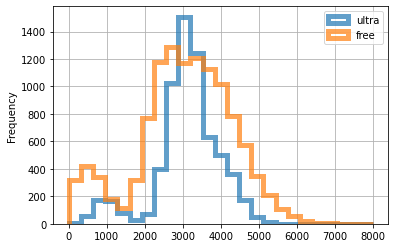

In [46]:
ax = df_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 8000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='ultra',)
df_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 8000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='free',
    ax=ax,
    grid=True,
    legend=True,
) 

plt.xlabel= ('расстояние поездок пользователей')
plt.ylabel = ('количество пользователей')
plt.show()

**По графику можно сказать, что распределение расстояния пользователей с подпиской и без подписки, примерно одинаковое. Но наблдается превышение количества поездок у пользователей с подпиской против пользователей без подписки (1500 против 1300) при значении дистанции в 2800-3100 метров.**

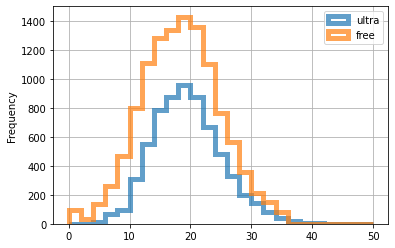

In [47]:
ax = df_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='ultra',
)
df_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='free',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.xlabel=('Продолжительность поездки')
plt.ylabel=('количество поездок')
plt.show()

**А в этом граыике наооборот, количество пользователей без подписки, при продолжительности поездок от 15 до 25 мин, существенно больше количества пользователей с подпиской(1400 против 900)**

**Шаг 5. Подсчёт выручки**

In [48]:
final_data.head(20)


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16,2021-11-22,11,6,0,199


In [49]:
final_data.describe()


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,18.303520,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.094928,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,1.000000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,14.000000,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,18.000000,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,22.000000,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,41.000000,12.000000,8.000000,50.000000,199.000000


**Округлим стобец duration вниз до ближайшего целого числа с помощью метода np.ceil**

In [50]:
final_data['duration'] = np.ceil(final_data['duration'])

In [51]:
final_data_group = final_data.groupby(['user_id', 'month']).agg({'distance': ['count', 'sum'],
                                                   'duration': 'sum'}).reset_index()

final_data_group.columns = final_data_group.columns.droplevel(0)
final_data_group.columns = ['user_id', 'month', 'distance_count', 'distance_sum', 'duration_sum']
final_data_group

                 




,user_id,month,distance_count,distance_sum,duration_sum
0,1,1,2,7027.511294,42.0
1,1,4,1,754.159807,7.0
2,1,8,2,6723.470560,46.0
3,1,10,2,5809.911100,32.0
4,1,11,3,7003.499363,56.0
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0
11327,1534,8,2,7622.453034,48.0
11328,1534,9,1,4928.173852,23.0
11329,1534,11,4,13350.015305,78.0


In [52]:
final_data.head()



,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [53]:
final_data_group = final_data.groupby(['user_id', 'name', 'minute_price', 'subscription_type','start_ride_price', 'subscription_fee', 'month']).agg({'distance': ['count', 'sum'], 'duration': 'sum'}).reset_index()

final_data_group.columns = final_data_group.columns.droplevel(0)
final_data_group.columns = ['user_id', 'name', 'minute_price', 'subscription_type','start_ride_price', 'subscription_fee', 'month', 'distance_count', 'distance_sum', 'duration_sum']
final_data_group

,user_id,name,minute_price,subscription_type,start_ride_price,subscription_fee,month,distance_count,distance_sum,duration_sum
0,1,Кира,6,ultra,0,199,1,2,7027.511294,42.0
1,1,Кира,6,ultra,0,199,4,1,754.159807,7.0
2,1,Кира,6,ultra,0,199,8,2,6723.470560,46.0
3,1,Кира,6,ultra,0,199,10,2,5809.911100,32.0
4,1,Кира,6,ultra,0,199,11,3,7003.499363,56.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,8,free,50,0,6,2,3409.468534,26.0
11327,1534,Альберт,8,free,50,0,8,2,7622.453034,48.0
11328,1534,Альберт,8,free,50,0,9,1,4928.173852,23.0
11329,1534,Альберт,8,free,50,0,11,4,13350.015305,78.0


In [54]:
def revenue(row):
    try:
        revenue = row['start_ride_price'] * row['distance_count']\
        + row['minute_price'] * row['duration_sum'] + row['subscription_fee']
        return revenue
    except:
        return 'ошибка'

final_data_group['revenue'] = final_data_group.apply(revenue, axis=1)
final_data_group.head()


,user_id,name,minute_price,subscription_type,start_ride_price,subscription_fee,month,distance_count,distance_sum,duration_sum,revenue
0,1,Кира,6,ultra,0,199,1,2,7027.511294,42.0,451.0
1,1,Кира,6,ultra,0,199,4,1,754.159807,7.0,241.0
2,1,Кира,6,ultra,0,199,8,2,6723.470560,46.0,475.0
3,1,Кира,6,ultra,0,199,10,2,5809.911100,32.0,391.0
4,1,Кира,6,ultra,0,199,11,3,7003.499363,56.0,535.0


In [58]:
final_data_group

,user_id,name,minute_price,subscription_type,start_ride_price,subscription_fee,month,distance_count,distance_sum,duration_sum,revenue
0,1,Кира,6,ultra,0,199,1,2,7027.511294,42.0,451.0
1,1,Кира,6,ultra,0,199,4,1,754.159807,7.0,241.0
2,1,Кира,6,ultra,0,199,8,2,6723.470560,46.0,475.0
3,1,Кира,6,ultra,0,199,10,2,5809.911100,32.0,391.0
4,1,Кира,6,ultra,0,199,11,3,7003.499363,56.0,535.0
...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,8,free,50,0,6,2,3409.468534,26.0,308.0
11327,1534,Альберт,8,free,50,0,8,2,7622.453034,48.0,484.0
11328,1534,Альберт,8,free,50,0,9,1,4928.173852,23.0,234.0
11329,1534,Альберт,8,free,50,0,11,4,13350.015305,78.0,824.0


***Проверка гипотез***

**Чтобы проверить первую гипотезу, установим следующие ограничения:
Н0 (нулевая гипотеза) - время(duration) поездок пользователей с подпиской = времени(duration) поездок пользователей без подписки. 
Н1 - альтернативная гипотеза,которую будем проверять - duration(время) поездок с подпиской больше времени(duration) поездок без подписки.**


In [55]:
duration_ultra = df_ultra['duration']
duration_free = df_free['duration']



results = st.ttest_ind(duration_ultra, duration_free, 
                    alternative='greater')
                      
print(results.pvalue)

alpha = 0.05
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')
    

2.4959453720736625e-34
Отвергаем нулевую гипотезу


**При данном уровне статистической значимости в 0.5% по результатам теста мы отвергаем нулевую гипотезу о равенстве средней продолжительности поездок пользователей с подиской и без подписки, так как средняя продожительность поездок пользователейй с подпиской больше средней продолжительности поездок пользователей без подписки**

**Установим гипотезу Н0 = среднее время поездки пользователей с подпиской равно оптимальному расстоянию с точки зрени износа самоката 3130 метров
Н1 - альтернативная гипотеза -  среднее время поездки пользователей с подпиской больше 3130 метров**

In [56]:
distance_ultra = df_ultra['distance']

interested_value = 3130

results = st.ttest_1samp(distance_ultra, interested_value,
                        alternative = 'greater')
print(results.pvalue)
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')
    


0.9195368847849785
Не можем отвергнуть нулевую гипотезу


**Не удалось отвергнуть нулевую гипотез при статистическом уровне знаимости в 5% процентов. Поэтому мы не можем утверждать, что расстояние на тарифе ультра больше оптимального в 3130 метров**

**Н0=Выручка от пользователей с подпиской больше выручки пользователей без подписки**

In [57]:
ultra_revenue = final_data_group.loc[final_data['subscription_type'] == 'ultra', 'revenue']
                               
free_revenue =  final_data_group.loc[final_data['subscription_type'] == 'free', 'revenue']



results = st.ttest_ind(ultra_revenue, free_revenue,
                        alternative = 'greater')
alpha = 0.05
                               
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')
    
                               

3.819490444237055e-17
Отвергаем нулевую гипотезу


**Можно предположить, что по результатам проверки при данном уровне статистической значимости равным 5%, мы  отвергаем нулевую гипотезу, а значит можем утверждать, что гипотеза о том, что выручка от пользователей с подпиской больше выручки пользователей без подписки, не подтвердилась.**

***Можно использовать гипотезу о равенстве средних выборок
Н0: μ1 = μ2
H1: μ1 != μ2,
где μ1, μ2 - это средние значения обращений пользователей в техподдержку до и после обновления
используемый метод - scipy.stats.ttest.rel***

**Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
Возраст пользователей укладывается в промежуток от 20 до 30 лет
В основном пользователи проезжают от 2.5 км до 4 км.
Чаще всего длительность поездки состовляет 13 - 22 минут
Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:**

**Для пользователей с ultra подпиской
Для пользователей с free подпиской
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.**

**Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.**

**Проверили гипотезы:**

**Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу, и пришли к выводу, что пользователи с подпиской тратят не больше времени на поездки, чем пользователи на бесплатном тарифе
Гипотезу, что пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку,
не удалось отвергнуть, а значит она подтвердилась.
Гпотезу о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
подтвердилась**